In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from ucimlrepo import fetch_ucirepo 



# Fetching data

In [ ]:
iris = fetch_ucirepo(id=53) 
  
X = iris.data.features 
y = iris.data.targets 


# Utils, plotting

In [23]:
def read_dataset(path):
    df = pd.read_csv(path)
    return df

def plot(title, x1, y1, label1 = None, title1 = None, 
         x2 = None, 
         y2 = None, 
         x3 = None,
         y3 = None,
         label2 = None,
         label3 = None,
         title2 = None,
         mode1 = 'yo',
         mode2 = 'g^',
        mode3 = 'r+'):
    
    plt.plot(x1, y1, mode1, label = label1 if label1 is not None else '')
    if x2 is not None and y2 is not None:
        plt.plot(x2, y2, mode2, label = label2 if label2 is not None else '')
    if x3 is not None and y2 is not None:
        plt.plot(x3, y3, mode3, label = label3 if label3 is not None else '')
          
    plt.title(title)
    plt.xlabel(title1 if title1 is not None else '')
    plt.ylabel(title2 if title2 is not None else '')
    
    plt.legend()
    plt.show()
    
def train_test_split(set1, set2, test_size, random_state=21):
    np.random.seed(random_state)
    indices = np.arange(len(set1))
    np.random.shuffle(indices)
    
    test_indices = indices[:int(test_size * len(set1))]
    train_indices = indices[int(test_size * len(set1)):]
    
    # return set1[train_indices], set1[test_indices], set2[train_indices], set2[test_indices]
    return set1.iloc[train_indices], set1.iloc[test_indices], set2.iloc[train_indices], set2.iloc[test_indices]

    
def normalisation(x_train__, x_test__):
    if isinstance(x_train__, pd.DataFrame):
        x_train__ = x_train__.values.tolist()
    if isinstance(x_test__, pd.DataFrame):
        x_test__ = x_test__.values.tolist()
    if isinstance(x_train__[0], float) or len(x_train__[0]) == 1:
        xmin = min(x_train__)
        xmax = max(x_train__)
        return ([(value - xmin) / (xmax - xmin) for value in x_train__],
                [(value - xmin) / (xmax - xmin) for value in x_test__], [xmin, xmax])
    
    if len(x_train__[0]) == 2:
        x_train__1 = [x[0] for x in x_train__]
        x_train__2 = [x[1] for x in x_train__]
        x_test__1 = [x[0] for x in x_test__]
        x_test__2 = [x[1] for x in x_test__]
        
        x_train_norm1, x_test_norm1, min_max1 = normalisation(x_train__1, x_test__1)
        x_train_norm2, x_test_norm2, min_max2 = normalisation(x_train__2, x_test__2)
        return list(zip(x_train_norm1, x_train_norm2)), list(zip(x_test_norm1, x_test_norm2)), [min_max1, min_max2]

# Logistic Regressor - BCE loss function

In [19]:
class LogisticRegression:
    def __init__(self, max_iter=100, rate=0.01, decision=0.5):
        self.coef = None
        self.intercept = 0
        self.max_iter = max_iter
        self.rate = rate
        self.decision = decision

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def predict_proba(self, x):
        return self.sigmoid(np.dot(x, self.coef) + self.intercept)

    def fit(self, x, y_):
        x = np.array(x)
        y_ = np.array(y_)
        n_samples, n_features = x.shape
        self.coef = np.random.randn(n_features)
        self.intercept = 0

        for _ in range(self.max_iter):
            linear_model = np.dot(x, self.coef) + self.intercept
            y_pred = self.sigmoid(linear_model)
            error = y_pred - y_
            grad_w = np.dot(x.T, error) / n_samples
            grad_b = np.mean(error)
            self.coef -= self.rate * grad_w
            self.intercept -= self.rate * grad_b

    def predict(self, x):
        x = np.array(x)
        probs = self.predict_proba(x)
        return [p >= self.decision for p in probs]

# Data

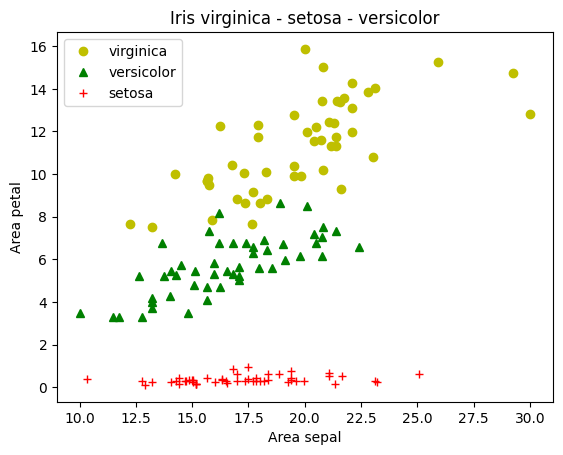

In [26]:
area_sepal = [ (a * b) for (a, b) in zip(X['sepal length'], X['sepal width'])]
area_petal = [ (a * b) for (a, b) in zip(X['petal length'], X['petal width'])]

area_sepal = list(area_sepal)
area_petal = list(area_petal)
y = y.values


plot(title = 'Iris virginica - setosa - versicolor',
     x1=[area_sepal[i] for i in range(len(y)) if y[i] == 'Iris-virginica'], 
     y1=[area_petal[i] for i in range(len(y)) if y[i] == 'Iris-virginica'], 
     label1='virginica',
     x2=[area_sepal[i] for i in range(len(y)) if y[i] == 'Iris-versicolor'], 
     y2=[area_petal[i] for i in range(len(y)) if y[i] == 'Iris-versicolor'], 
     label2='versicolor',
     x3=[area_sepal[i] for i in range(len(y)) if y[i] == 'Iris-setosa'], 
     y3=[area_petal[i] for i in range(len(y)) if y[i] == 'Iris-setosa'], 
     label3='setosa',
     title1='Area sepal', title2='Area petal')


# Train test split

In [27]:
area_sepal_df = pd.Series(area_sepal, name='median_radius')
area_petal_df = pd.Series(area_petal, name='std_texture')
data_df = pd.concat([area_sepal_df, area_petal_df], axis=1)


x_train, x_test, y_train, y_test = train_test_split(data_df, y, test_size=0.2, random_state=21)

def plot_data(x, y, title):
    area_sepal_train, area_petal_train = zip(*x)
    
    plot(title = title,
         x1=[area_sepal_train[i] for i in range(len(y)) if y[i] == 'Iris-virginica'], 
         y1=[area_petal_train[i] for i in range(len(y)) if y[i] == 'Iris-virginica'], 
         label1='virginica',
         x2=[area_sepal_train[i] for i in range(len(y)) if y[i] == 'Iris-versicolor'], 
         y2=[area_petal_train[i] for i in range(len(y)) if y[i] == 'Iris-versicolor'], 
         label2='versicolor',
         x3=[area_sepal_train[i] for i in range(len(y)) if y[i] == 'Iris-setosa'], 
         y3=[area_petal_train[i] for i in range(len(y)) if y[i] == 'Iris-setosa'], 
         label3='setosa',
         title1='Area sepal', title2='Area petal')

    
plot_data(x_train, y_train, 'Iris virginica-versicolor-setosa train data')
plot_data(x_test, y_test, 'Iris virginica-versicolor-setosa test data')

AttributeError: 'numpy.ndarray' object has no attribute 'iloc'